<a href="https://colab.research.google.com/github/vedantdave77/project.Orca/blob/master/Project/project-Dog_Breed_CNN_Classification/CNN_Classfier-using_%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Algorithm from Scrtch using PyTorch

In this notebook, I will create one algorithm that will could of web applicatoin of mobile appocation. But, that will decided after its performace.   

First, I tried the same prediction with transfer learning and it gave me good performance. So, here I want to try my best to make one classifier which can heplp me to get best accuracy.

Note: I can understand that, the pretrained models are too dense and thats why gave best performance on image dataset. But, stil I want to see the perfornce by adjusting 2 to 3 layer_group. 

### Do you know the breed of this Dog?


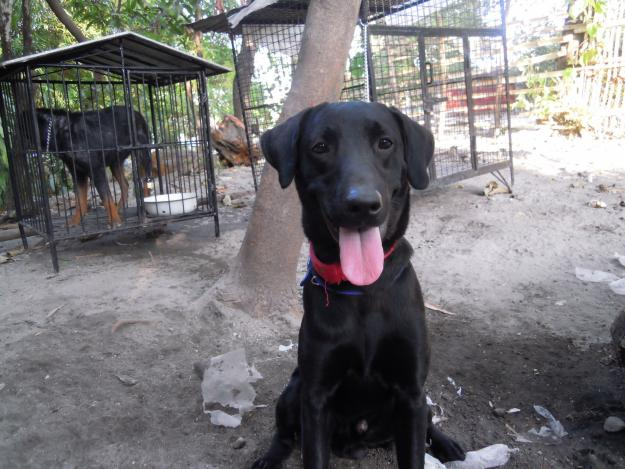

In [3]:
from IPython.display import Image,display 
display(Image('/content/drive/My Drive/proj/images/Labrador_retriever_06449.jpg'))

**I know, its hard to tell,but Neural Network can do it. Let's ask Neural_Net. for this solution.**


---
> Hey, Neurl_Net; Can you say it?


> Neural_Net: 
> Yes, sure for that I will think as follow, and for better understanding, I break the notebook into separate steps. F

**Steps**
1. load, and Trasnfer data
2. Model Architecture
3. Add Loass and Optimizer
4. Train and Validate Model
5. Model Testing
6. Conclusion for App _ Algorithm. 

---
   .


I use colab and, sved data on drive, so let's connect drive. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


> Here, I set some common parameters, which will be used for trainloader. By doing this I want to predefine all the parameter across notebook, so It will not change during training, validation and testing phase. 

In [18]:
# set parameters which I usually used during project 
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
img_short_side_resize = 256
img_input_size = 224
shuffle = True
num_workers = 16                                                                 # first try with 16, but if you have memoy error then, reduce it. If I use more processor, then they work in parallel, and use more space.
batch_size = 64                                                                 # start with 64, it means it takes 64 data at a time for process, will spend more memory and may be raise our of meory problem.

""" 
Note: 

By decreasing, num_worker and batchsize you save space on GPU, but it will result
in increase runtime. 

When Algorithm takess more time, then you may suffer GPU or Kernel Stability issue.

"""

' \nNote: \n\nBy decreasing, num_worker and batchsize you save space on GPU, but it will result\nin increase runtime. \n\nWhen Algorithm takess more time, then you may suffer GPU or Kernel Stability issue.\n\n'

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `Data/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `Data/lfw`.

> I am using a google drive. You can download data from my drive [setup](https://drive.google.com/drive/folders/1w4YfTwN-WqtFa2eNwj6Mb3Cxwj9HeU_T?usp=sharing) 

---

Please make your own setup, if drive is restricted for you!, Thank you.

Drive 
- proj
-- Data --> DogImages -->Breed Type[i] ---> Dog Image (breed specific)[i]
-- lwf --> Human name[i] --> Human Image[i]
-- Image --> sample Images
-- casecade --> .xml file for face detection.

## Data : [Access/ Transform/ Load]

Please, refer following documentation to implement it ownself.

Reference: 
1. [Data Loader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

2. [Customize Data Set Operation](https://pytorch.org/docs/stable/torchvision/datasets.html)

3. [Data Transform](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)


In [19]:
# import required libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True                                          # cutting image (specially, short of edge)

import torch
import torchvision.transforms as transforms
from torchvision import datasets 

# define data_transformation and batch_size 
transform_train = transforms.Compose([
                                      transforms.Resize(img_short_side_resize),                                                                             # resize images to 256 
                                      transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation =0.2, hue = 0.1),                                 # adjust contrast, saturationa and brighness so, network can identify each pattern properly.
                                      transforms.RandomHorizontalFlip(),                                                                                    # to reduce chance of overfiting (incase of duplication, sometime used for increase dataset)
                                      transforms.RandomResizedCrop(img_input_size, scale=(0.08,1), ratio = (1,1)),
                                      transforms.ToTensor(),                                                                                                # because, neural_net see images as tensor.
                                      transforms.Normalize(mean = norm_mean, std = norm_std)                                                                # take data to normal scale, will easy for operation.
                                       ])

transform_test = transforms.Compose([
                                     transforms.Resize(img_input_size),              
                                     transforms.FiveCrop(img_input_size),                                                                                   # five crop, crops image in 4 corner and 1 center. with size 224 out of 256. 
                                     transforms.Lambda(lambda crops: torch.stack([
                                                                                  transforms.Compose([
                                                                                                      transforms.ToTensor(),
                                                                                                      transforms.Normalize(mean = norm_mean, std = norm_std)])(crop) for crop in crops   # will return 4D array 
                                                                                  ]))

                                    ])

# load data (define datasets)
train_data = datasets.ImageFolder("/content/drive/My Drive/proj/Data /dogImages/train/",transform_train)
valid_data = datasets.ImageFolder("/content/drive/My Drive/proj/Data /dogImages/valid/",transform_test)
test_data  = datasets.ImageFolder("/content/drive/My Drive/proj/Data /dogImages/test/",transform_test)

# separate imput and labels(classes)
data = {"train" : train_data, "valid" : valid_data, "test" : test_data}
n_classes = len(train_data.classes)

# create loaders (train, valid, test)
train_loader = torch.utils.data.DataLoader(data["train"], batch_size = batch_size, num_workers = num_workers, shuffle = shuffle, pin_memory = True)
valid_loader = torch.utils.data.DataLoader(data["valid"], batch_size = int(np.floor(batch_size/5)), num_workers=0, shuffle = shuffle, pin_memory = True) 
test_loader = torch.utils.data.DataLoader(data["test"], batch_size = int(np.floor(batch_size/5)), num_workers=0, shuffle = shuffle, pin_memory = True)

# loader dictionary
loaders_dict = {"train" : train_loader, "valid" : valid_loader, "test" : test_loader}

## Model Architecture :

### Create CNN Classifier using PyTorch


**NOTE:** Here, I used 3 layer_group (with 3,4,5 depth) but later I reduced it, because of **memory issue with GPU. Data Loader also killed operation.** with error 303. :(

I tried to **resolve it by small batch size. Reduce it by half (from 64 to 32, and also reduce subprocessor (from 16 to 8). But, really, it takes too much time.** I have **12 hours stability on GPU, So, its worth less to try.** Please take your decision according to your processor capacity and reliabilty. :( , 

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# generate the CNN Architecture from Scratch
class CNN(nn.Module):
    def __init__(self,n_classes,layer1_depth= 32):
        super(CNN, self).__init__()
        
        # define layer wise depth
        layer2_depth = layer1_depth *2                                         # 32 --> 64
        # layer2_1_depth = layer2_depth *2                                      # 64 --> 128
        layer3_depth = layer2_depth *2                                       # 128 --> 256
        # layer3_1_depth = layer3_depth *2                                       # 256 --> 512


        # define Max-pooling layer
        self.pool = nn.MaxPool2d(2,2)

        # convolution set 1 
        self.conv1_1 = nn.Conv2d(3, layer1_depth, 3, stride=1, padding=1)                                      # first layer 3 --> 32 --> 32 --> (repetation on same layer give levearage of knowing feature in better way...)
        self.conv1_2 = nn.Conv2d(layer1_depth, layer1_depth, 3, stride=1, padding=1)
        self.conv1_3 = nn.Conv2d(layer1_depth, layer1_depth, 3, stride=1, padding=1)
        self.bn1_1 = nn.BatchNorm2d(layer1_depth)
        self.bn1_2 = nn.BatchNorm2d(layer1_depth)
        self.bn1_3 = nn.BatchNorm2d(layer1_depth)

        # convolution set 2 
        self.conv2_1 = nn.Conv2d(layer1_depth, layer2_depth, 3, stride=1, padding=1)                         # second layer 32 --> 64 --> 64 --> 128 --> 128
        self.conv2_2 = nn.Conv2d(layer2_depth, layer2_depth, 3, stride=1, padding=1)
        self.conv2_3 = nn.Conv2d(layer2_depth, layer2_depth, 3, stride=1, padding=1)
        # self.conv2_4 = nn.Conv2d(layer2_1_depth, layer2_1_depth, 3, stride=1, padding=1)
        self.bn2_1 = nn.BatchNorm2d(layer2_depth)
        self.bn2_2 = nn.BatchNorm2d(layer2_depth)
        self.bn2_3 = nn.BatchNorm2d(layer2_depth)
        #self.bn2_4 = nn.BatchNorm2d(layer2_1_depth)

        # convolution set 3 
        self.conv3_1 = nn.Conv2d(layer2_depth, layer3_depth, 3, stride=1, padding=1)                        # third layer 128 --> 256 --> 256 --> 512 --> 512 --> 512 
        self.conv3_2 = nn.Conv2d(layer3_depth, layer3_depth, 3, stride=1, padding=1)
        self.conv3_3 = nn.Conv2d(layer3_depth, layer3_depth, 3, stride=1, padding=1)
        # self.conv3_4 = nn.Conv2d(layer3_1_depth, layer3_1_depth, 3, stride=1, padding=1)
        # self.conv3_5 = nn.Conv2d(layer3_1_depth, layer3_1_depth, 3, stride=1, padding=1)
        self.bn3_1 = nn.BatchNorm2d(layer3_depth)
        self.bn3_2 = nn.BatchNorm2d(layer3_depth)
        self.bn3_3 = nn.BatchNorm2d(layer3_depth)
        #self.bn3_4 = nn.BatchNorm2d(layer3_1_depth)
        #self.bn3_5 = nn.BatchNorm2d(layer3_1_depth)

        # output 
        self.output = nn.Linear(layer3_depth,n_classes)                         # 512 ---> 133

        # Initialize weight
        nn.init.kaiming_normal_(self.conv1_1.weight, nonlinearity='relu')       # specialy type of weight initialize method, mostly used for deep neural network (deep>30 layers, and give better result as rellu activatoin function) - give result improvement layer by layer due to relu activatoin function.
        nn.init.kaiming_normal_(self.conv1_2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv1_3.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2_1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2_2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2_3.weight, nonlinearity='relu')
        # nn.init.kaiming_normal_(self.conv2_4.weight, nonlinearity='relu')       
        nn.init.kaiming_normal_(self.conv3_1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv3_2.weight, nonlinearity='relu') 
        nn.init.kaiming_normal_(self.conv3_3.weight, nonlinearity='relu')
        # nn.init.kaiming_normal_(self.conv3_4.weight, nonlinearity='relu')       
        # nn.init.kaiming_normal_(self.conv3_5.weight, nonlinearity='relu')              




    def forward(self,x):
        # Conv Flow 1
        x = F.relu(self.bn1_1(self.conv1_1(x)))
        x = F.relu(self.bn1_2(self.conv1_2(x)))
        x = F.relu(self.bn1_3(self.conv1_3(x)))
        x = self.pool(x)

        # Conv Flow 2
        x = F.relu(self.bn2_1(self.conv2_1(x)))
        x = F.relu(self.bn2_2(self.conv2_2(x)))
        x = F.relu(self.bn2_3(self.conv2_3(x)))
        # x = F.relu(self.bn2_4(self.conv2_4(x)))
        x = self.pool(x)

        # Conv Flow 3
        x = F.relu(self.bn3_1(self.conv3_1(x)))
        x = F.relu(self.bn3_2(self.conv3_2(x)))
        x = F.relu(self.bn3_3(self.conv3_3(x)))
        # x = F.relu(self.bn3_4(self.conv3_4(x)))
        # x = F.relu(self.bn3_5(self.conv3_5(x)))
        x = self.pool(x)

        # fuse the dimension (height=2, width =3)
        x = x.view(x.size(0),x.size(1),-1)                                      # change image dimension. (unflattening)
        x = x.max(2)[0]

        # output 
        x = self.output(x)
        
        return x

Check CUDA availability.

In [23]:
Conv_model = CNN(n_classes)

use_cuda = torch.cuda.is_available()
if not use_cuda:
    print('CUDA is not available.  Training on CPU ...')
    device = "cpu"
else:
    print('CUDA is available!  Training on GPU ...')
    device = torch.device("cuda:0")
    print("Using",torch.cuda.get_device_name(device))
    

if use_cuda:
    Conv_model.cuda()           

CUDA is available!  Training on GPU ...
Using Tesla K80


Learning rate range.

In [24]:
# Now for the learning rate. Explanation below. 
learning_rates = 5e-4 * np.logspace(0,1.5,9)                                    # 9 values between log( 0 to 1.5 ) * 5^-4
learning_rate = learning_rates[2]

## Specify loss function and optimizer 



In [25]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau 

# loss function 
criterion = nn.CrossEntropyLoss()                                               # cross entropy loss function

# optimizer 
optimizer = optim.Adam(Conv_model.parameters(),learning_rate)                   # use ADAM optimizer

# learning_rate shedular 
scheduler = ReduceLROnPlateau(optimizer,'min',verbose=True)                     # use learning rate scheduler. ()


## Model Training and Validation.

In [26]:
import time 
def train_epoch(model,train_loader,optimizer,criterion,device):
    train_loss = 0.0
    model.train()                                                               # define training job
    for batch_idx, (data,target) in enumerate(train_loader):                                                                     
        data, target = data.to(device),target.to(device)                        # move to CUDA
        optimizer.zero_grad()                                                   # reset gradient 
        output = model(data)                                                    # run model and get output 
        loss = criterion(output, target)                                        # calculate loss
        train_loss += loss.item() * data.size(0)                                # update loss
        loss.backward()                                                         # compute loss for every parameters (distibute total loss to each para according to weight)
        optimizer.step()                                                        # update parameter based on current gradient.
    train_loss = train_loss/len(train_loader.dataset)
    return model, train_loss

In [27]:
def valid_epoch(model,valid_loader,criterion,device,fivecrop): 
    valid_loss = 0.0
    model.eval()
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(device), target.to(device)                   # tranfer to CUDA Tesla P 100
            if fivecrop == "mean":
                bs, ncrops, c, h, w = data.size()                               # dimension due to 5 crop method,               
                output = model(data.view(-1,c,h,w))
                
                output = output.view(bs, ncrops, -1).mean(1)                    # modify data for output. 
            elif fivecrop == "max":
                bs, ncrops, c,h,w = data.size()
                output = model(data.view(-1,c,h,w))
                output = output.view(bs, ncrops, -1).max(1)[0] 
            else:
                output = model(data)
            
            loss = criterion(output, target)                                    # update losses
            valid_loss += loss.item() * data.size(0)
    valid_loss = valid_loss/len(valid_loader.dataset)
    return valid_loss    

### Pipeline (training and validation)

In [28]:
# create train pipeline
def train(n_epochs, loaders_dict, model,optimizer, criterion, device, path_model, fivecrop = None, lr_scheduler = None):
    valid_loss_min = np.Inf
    train_loss = []
    valid_loss = []
    # time everything 
    time_start = time.time()
    for epoch in range(1, n_epochs+1): 
        time_start_epoch = time.time()
        
        model, train_loss_epoch = train_epoch(model,loaders_dict["train"],optimizer,criterion,device)
        train_loss.append(train_loss_epoch)

        # validate this epoch 
        valid_loss_epoch = valid_epoch(model,loaders_dict["valid"],criterion, device, fivecrop)

        # call learning rate scheduler 
        if lr_scheduler is not None:
            lr_scheduler.step(valid_loss_epoch)
        valid_loss.append(valid_loss_epoch)
        
        # save model for new lowest validation loss 
        if valid_loss_epoch <= valid_loss_min:
            torch.save(model.state_dict(),path_model)
            valid_loss_min = valid_loss_epoch

        print("Epoch {} done in {:.2f} seconds. \t | Training Loss: {:.3f} \t | Validation Loss: {:.3f}".format(
            epoch, time.time() - time_start_epoch, train_loss_epoch, valid_loss_epoch))
    print(f"{n_epochs} epochs ready in {(time.time() - time_start):.3f} seconds. Minimum validation loss: {valid_loss_min:.3f}")
    model.load_state_dict(torch.load(path_model))
    return model
        
# give real training action
torch.cuda.empty_cache() 
Conv_model_1 = train(100, loaders_dict, Conv_model, optimizer, criterion, device, 'Conv_model.pt', fivecrop = "mean", lr_scheduler = scheduler)

Epoch 1 done in 198.77 seconds. 	 | Training Loss: 4.989 	 | Validation Loss: 4.820
Epoch 2 done in 205.04 seconds. 	 | Training Loss: 4.792 	 | Validation Loss: 4.825
Epoch 3 done in 204.86 seconds. 	 | Training Loss: 4.689 	 | Validation Loss: 4.747
Epoch 4 done in 202.57 seconds. 	 | Training Loss: 4.625 	 | Validation Loss: 4.646
Epoch 5 done in 200.34 seconds. 	 | Training Loss: 4.576 	 | Validation Loss: 4.555
Epoch 6 done in 198.31 seconds. 	 | Training Loss: 4.518 	 | Validation Loss: 4.552
Epoch 7 done in 196.54 seconds. 	 | Training Loss: 4.486 	 | Validation Loss: 4.539
Epoch 8 done in 203.22 seconds. 	 | Training Loss: 4.434 	 | Validation Loss: 4.407
Epoch 9 done in 200.46 seconds. 	 | Training Loss: 4.377 	 | Validation Loss: 4.367
Epoch 10 done in 200.22 seconds. 	 | Training Loss: 4.311 	 | Validation Loss: 4.261
Epoch 11 done in 207.41 seconds. 	 | Training Loss: 4.234 	 | Validation Loss: 4.270
Epoch 12 done in 204.75 seconds. 	 | Training Loss: 4.172 	 | Validation L

In [29]:
# load best validation accuracy model
Conv_model_1.load_state_dict(torch.load("Conv_model.pt"))                       # load model from saved file instance.

<All keys matched successfully>

## Model Testing


In [30]:
# create test pipeline
def test(loaders, model, criterion, device):
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            data, target = data.to(device), target.to(device)
            bs, ncrops, c, h, w = data.size()
            print(data.size)
            print(data.shape)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.view(-1, c, h, w)) # fuse batch size and ncrops
            output = output.view(bs, ncrops, -1).mean(1)        
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [31]:
test(loaders_dict, Conv_model, criterion, device)

Test Loss: 1.365910


Test Accuracy: 63% (532/836)


## Conclusion: 

The accuracy we get is 63 percent, which is lower than pretrained models, so for my web/mobile appication I think transfer learning will be great choice. 

Well, I can improve my accuracy by deep network, but I have limited space and computing power.

Problem and Temp_solution: 

My algorithm is already optimized by ADAM optimizer, so the only solution I see is deep layer with more feature extraction layers, which I made earlier. Due to space and time complexity, I can not trained it. 

The another solution is reduce subprocessor and batch size, which will reduce memory consuption. So, somehow  I  can manage memory, but the time taken by algorithm is quiet higher. So, kernel and gpu stability is issue. 

Hope:

Still, in future if I have proper adjustment, then I will try to improve it. Thankyou. So, let's implement real application algorithm. I will do it in Dog_Breed_App.ipynb notebook. 

In [1]:
# keep learning, Enjoy Empowering